In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv("Sales.csv")

In [3]:
data.head()

,Date,Sales
0,2013-01,2815
1,2013-02,2672
2,2013-03,2755
3,2013-04,2721
4,2013-05,2946


<Axes: >

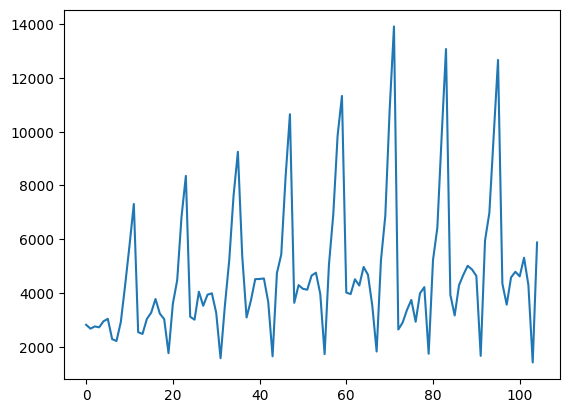

In [4]:
data['Sales'].plot()

In [5]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(['Date'])

In [6]:
data

,Date,Sales
0,2013-01-01,2815
1,2013-02-01,2672
2,2013-03-01,2755
3,2013-04-01,2721
4,2013-05-01,2946
...,...,...
100,2021-05-01,4618
101,2021-06-01,5312
102,2021-07-01,4298
103,2021-08-01,1413


In [8]:
data['Quarter'] = data['Date'].dt.quarter
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

In [9]:
data['Year'].value_counts()

2013    12
2014    12
2015    12
2016    12
2017    12
2018    12
2019    12
2020    12
2021     9
Name: Year, dtype: int64

In [11]:
Train = data[(data.Year<2020)]
Test = data[(data.Year>=2020)]

In [13]:
Train.groupby(['Month'])['Sales'].sum()

Month
1     24132
2     22389
3     25585
4     26161
5     27721
6     28207
7     23938
8     12469
9     30275
10    39632
11    59033
12    73897
Name: Sales, dtype: int64

In [14]:
Train['Monthly_sum'] = Train.groupby(['Month'])['Sales'].transform(sum)

<ipython-input-14-16af245b689f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train['Monthly_sum'] = Train.groupby(['Month'])['Sales'].transform(sum)


In [15]:
Train

,Date,Sales,Quarter,Year,Month,Monthly_sum
0,2013-01-01,2815,1,2013,1,24132
1,2013-02-01,2672,1,2013,2,22389
2,2013-03-01,2755,1,2013,3,25585
3,2013-04-01,2721,2,2013,4,26161
4,2013-05-01,2946,2,2013,5,27721
...,...,...,...,...,...,...
79,2019-08-01,1738,3,2019,8,12469
80,2019-09-01,5221,3,2019,9,30275
81,2019-10-01,6424,4,2019,10,39632
82,2019-11-01,9842,4,2019,11,59033


In [16]:
Train['Sales'].sum()

393439

In [17]:
24132*12

289584

In [18]:
289584/393439 #how much of my total sales can be explained by each month - If they are projected to 12 months

0.7360327776351607

In [20]:
Train['S.I'] = Train['Monthly_sum'].apply(lambda x: ((x*12)/Train['Sales'].sum()))

<ipython-input-20-8b4b9cb4e342>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train['S.I'] = Train['Monthly_sum'].apply(lambda x: ((x*12)/Train['Sales'].sum()))


In [21]:
Train = Train.sort_values(['Date'])
Train.index = range(len(Train))
Train['ID'] = range(1,len(Train)+1)

In [24]:
lm = linear_model.LinearRegression()
X = np.array(Train[['ID']])
Y = np.array(Train['Sales']).reshape(-1,1)

In [25]:
model = lm.fit(X,Y)

In [28]:
Test["ID"] = range(len(Test))
Test["ID"] = Test["ID"]+ max(Train["ID"])
X_test = np.array(Test[['ID']])
Y_test = model.predict(X_test)

<ipython-input-28-ed34b4c8d648>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test["ID"] = range(len(Test))
<ipython-input-28-ed34b4c8d648>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test["ID"] = Test["ID"]+ max(Train["ID"])


In [29]:
Test['Trend'] = Y_test

<ipython-input-29-7527f63443bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test['Trend'] = Y_test


In [30]:
Test['Prediction'] = Y_test*np.array(Train.iloc[0:len(Y_test)]["S.I"]).reshape(-1,1)

<ipython-input-30-f57faa05c1c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test['Prediction'] = Y_test*np.array(Train.iloc[0:len(Y_test)]["S.I"]).reshape(-1,1)


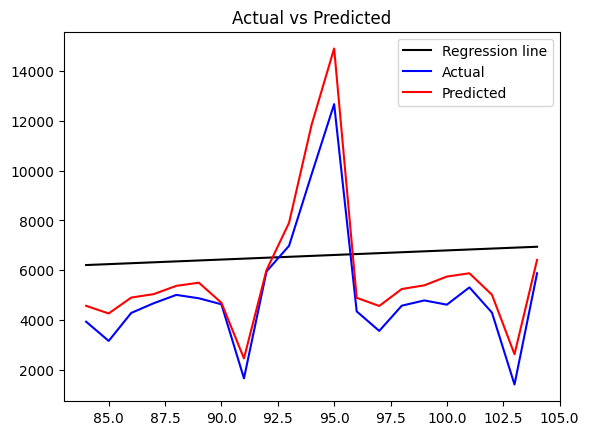

In [33]:
plt.title("Actual vs Predicted")
plt.plot(Test['Trend'],color = 'black',label = 'Regression line')
plt.plot(Test['Sales'], color = 'blue', label = 'Actual')
plt.plot(Test['Prediction'], color = 'red', label = 'Predicted')
plt.legend()
plt.show()